# Airline Dataset
---

## Importing Required Modules 
1. importing numpy for mathematical operation on arrays and dataframe.
2. importing pandas for reading data and data manipualtion.
3. importing matplotlib and seaborn to show the insights and  visualization from the dataset.
3. importing warnings for Warning messages that are typically issued in dataframe where it is useful to alert the user of some condition in a program, where that condition (normally) doesn t warrant raising an exception and terminating the program.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style = 'darkgrid')

## Reading Dataset and Checking the NaN Values , Data Types , and Statistical Analysis

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [3]:
df=pd.read_excel("Data_Train.xlsx")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [11]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [12]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [13]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [14]:
df.isnull().sum().sum()

0

## From df.info() we can see that Date_of_Journey is a object data type
1.Therefore, we have to convert this datatype into timestamp so  that we can use that column properly to find the insights.

2.For this we require pandas **to_datetime** to convert object data type to datetime dtype.



In [15]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [17]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

### We can see that Total_Stops is a Categorical column we can replace that column data into categories

In [18]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [19]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882


## 1st Insights: How many Flights with respect to their Stopages ?

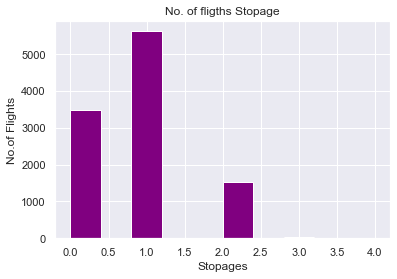

In [20]:
# From This Histogram  we can see that no.of flights and their Stopages
# In this Data maximum flights have 1 stopages 
# And there are few flights which have 3rd and 4th stopages 

plt.title('No. of fligths Stopage')
plt.hist(df['Total_Stops'],color='purple')
plt.xlabel('Stopages')
plt.ylabel('No.of Flights')
plt.show()

In [21]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

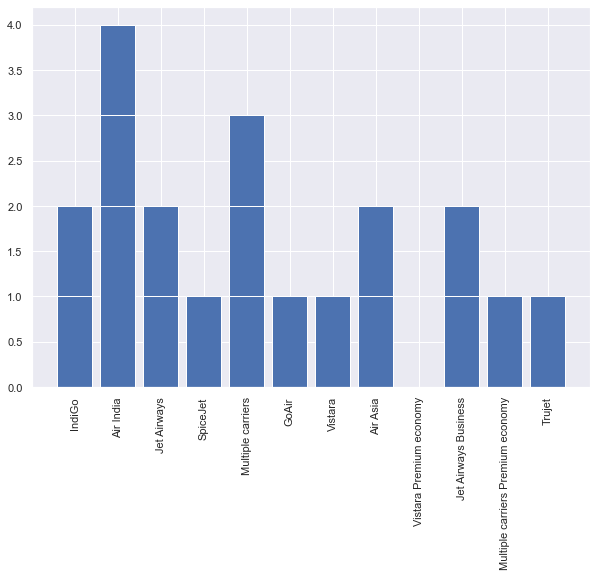

In [22]:
plt.figure(figsize=(10,7))
plt.bar(df['Airline'],df['Total_Stops'])
plt.xticks(rotation=90)
plt.show()


In [23]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [24]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,2023-02-03 05:50:00,2023-03-02 11:20:00,29h 30m,4,Change airports,17686


In [25]:
df[df['Airline']=='Vistara Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,2019-03-03,Banglore,New Delhi,BLR → DEL,2023-02-03 16:00:00,2023-02-03 18:35:00,2h 35m,0,No info,11793
7657,Vistara Premium economy,2019-01-03,Chennai,Kolkata,MAA → CCU,2023-02-03 07:05:00,2023-02-03 09:20:00,2h 15m,0,No info,9125
8615,Vistara Premium economy,2019-06-04,Banglore,Delhi,BLR → DEL,2023-02-03 11:30:00,2023-02-03 14:20:00,2h 50m,0,No info,5969


### 45 fligths have 3 Stopages

In [26]:
df.loc[df['Total_Stops']==3].count()

Airline            45
Date_of_Journey    45
Source             45
Destination        45
Route              45
Dep_Time           45
Arrival_Time       45
Duration           45
Total_Stops        45
Additional_Info    45
Price              45
dtype: int64

### Only 1 fligth have 4 Stopages

In [27]:
df.loc[df['Total_Stops']==4].count()

Airline            1
Date_of_Journey    1
Source             1
Destination        1
Route              1
Dep_Time           1
Arrival_Time       1
Duration           1
Total_Stops        1
Additional_Info    1
Price              1
dtype: int64

# 2nd Insights: What flight is Expensive and Cheaper ?

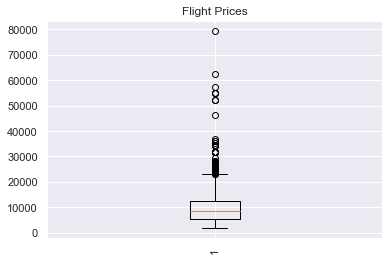

In [28]:
#This Boxplot show the Outliers in Flight Prices
#Only Vistara Premium Economy and Trujet has no Outliers
plt.boxplot(df['Price'])
plt.xticks(rotation=90,size=11)
plt.title('Flight Prices')
plt.show()

# 3rd Insights: Variation of Flight Price from Source

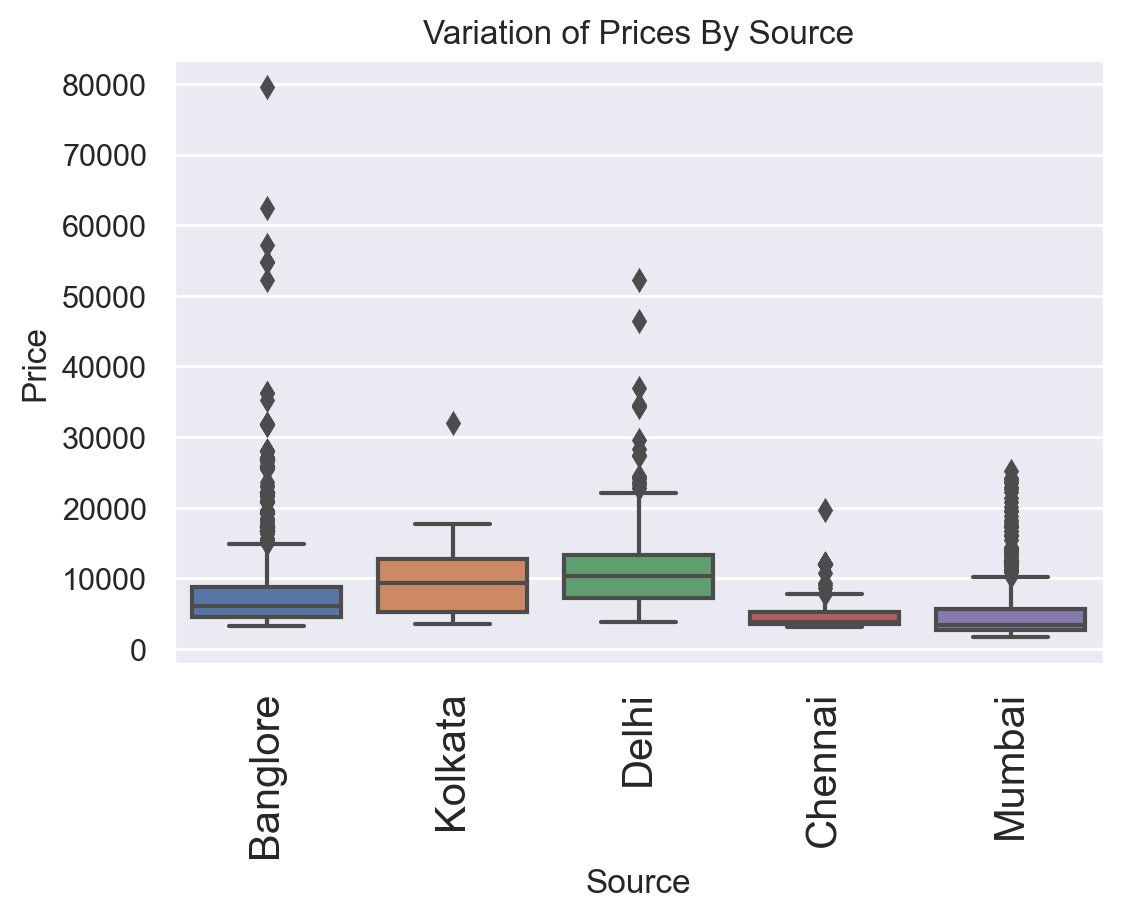

In [29]:
# From this boxplot we can see the maximum Outliers are in Bangalore and Minimum in KolKata
plt.figure(dpi=200)
sns.boxplot(df['Source'],df['Price'],data=df)
plt.xticks(rotation=90,size=15)
plt.title('Variation of Prices By Source')
plt.show()

In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882


In [32]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,2023-02-03 05:50:00,2023-03-02 11:20:00,29h 30m,4,Change airports,17686


In [33]:
df.loc[df['Total_Stops']==3]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
402,Air India,2019-06-15,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2023-02-03 05:15:00,2023-06-16 07:40:00,26h 25m,3,No info,10493
919,Air India,2019-12-05,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,2023-02-03 12:00:00,2023-05-13 23:15:00,35h 15m,3,No info,10991
1218,Air India,2019-06-27,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2023-02-03 05:15:00,2023-06-28 07:40:00,26h 25m,3,No info,11543
1665,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → DEL,2023-02-03 05:50:00,2023-03-02 12:15:00,30h 25m,3,No info,12346
2172,Air India,2019-05-18,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2023-02-03 05:15:00,2023-05-19 19:15:00,38h,3,No info,10703
2623,Air India,2019-12-03,Mumbai,Hyderabad,BOM → JDH → JAI → DEL → HYD,2023-02-03 09:40:00,2023-03-13 15:15:00,29h 35m,3,No info,18293
2633,Multiple carriers,2019-06-03,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,2023-02-03 11:35:00,2023-02-03 21:00:00,9h 25m,3,No info,21829
2718,Air India,2019-09-03,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,2023-02-03 05:15:00,2023-03-10 19:15:00,38h,3,No info,15586
2814,Air India,2019-12-03,Banglore,New Delhi,BLR → BOM → IDR → GWL → DEL,2023-02-03 17:25:00,2023-03-13 18:05:00,24h 40m,3,No info,13387
2822,Air India,2019-05-24,Kolkata,Banglore,CCU → DEL → COK → TRV → BLR,2023-02-03 10:00:00,2023-05-25 10:30:00,24h 30m,3,No info,13007


In [34]:
df.loc[df['Total_Stops']==2]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882
15,Air India,2019-03-03,Delhi,Cochin,DEL → AMD → BOM → COK,2023-02-03 16:40:00,2023-03-04 19:15:00,26h 35m,2,No info,14011
18,Air India,2019-12-06,Delhi,Cochin,DEL → CCU → BOM → COK,2023-02-03 20:15:00,2023-06-13 19:15:00,23h,2,No info,13381
25,Jet Airways,2019-09-06,Delhi,Cochin,DEL → IDR → BOM → COK,2023-02-03 21:25:00,2023-06-10 12:35:00,15h 10m,2,No info,13292
...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,2023-02-03 11:40:00,2023-02-03 19:00:00,7h 20m,2,No info,21219
10670,Air India,2019-12-05,Kolkata,Banglore,CCU → IXR → DEL → BLR,2023-02-03 05:50:00,2023-02-03 23:15:00,17h 25m,2,No info,11411
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,2023-02-03 23:05:00,2023-06-28 19:00:00,19h 55m,2,In-flight meal not included,11150
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,2023-02-03 13:25:00,2023-05-28 04:25:00,15h,2,No info,16704


In [35]:
df[df['Total_Stops']==1]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-02-03 18:05:00,2023-02-03 23:30:00,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-02-03 16:50:00,2023-02-03 21:35:00,4h 45m,1,No info,13302
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-03 18:55:00,2023-03-13 10:25:00,15h 30m,1,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-03 08:00:00,2023-03-02 05:05:00,21h 5m,1,No info,22270
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-03 08:55:00,2023-03-13 10:25:00,25h 30m,1,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,2023-02-03 18:15:00,2023-06-13 19:00:00,24h 45m,1,In-flight meal not included,10262
10667,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-03 22:55:00,2023-03-13 20:20:00,21h 25m,1,In-flight meal not included,11087
10669,Air India,2019-06-15,Delhi,Cochin,DEL → BOM → COK,2023-02-03 08:00:00,2023-02-03 19:15:00,11h 15m,1,No info,9929
10674,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-03 20:35:00,2023-03-13 21:20:00,24h 45m,1,In-flight meal not included,11087


In [36]:
df.loc[df['Total_Stops']==0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2023-02-03 09:00:00,2023-02-03 11:25:00,2h 25m,0,No info,3873
11,IndiGo,2019-04-18,Kolkata,Banglore,CCU → BLR,2023-02-03 20:20:00,2023-02-03 22:55:00,2h 35m,0,No info,4174
12,Air India,2019-06-24,Chennai,Kolkata,MAA → CCU,2023-02-03 11:40:00,2023-02-03 13:55:00,2h 15m,0,No info,4667
14,IndiGo,2019-04-24,Kolkata,Banglore,CCU → BLR,2023-02-03 17:15:00,2023-02-03 19:50:00,2h 35m,0,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,2019-05-21,Banglore,Delhi,BLR → DEL,2023-02-03 05:55:00,2023-02-03 08:35:00,2h 40m,0,No check-in baggage included,3257
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-02-03 19:55:00,2023-02-03 22:25:00,2h 30m,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-02-03 20:45:00,2023-02-03 23:20:00,2h 35m,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-02-03 08:20:00,2023-02-03 11:20:00,3h,0,No info,7229


In [37]:
df['Date_of_Journey'].mode()

0   2019-05-18
Name: Date_of_Journey, dtype: datetime64[ns]

In [38]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

## Extracting Journey Day and Month
For this we require pandas **to_datetime** to convert object data type to datetime dtype.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [39]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month

# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(columns=['Date_of_Journey'],inplace=True)

In [40]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882,6,9


# 4th Insights: On What Day and Month Have Flight Maximum Stopages

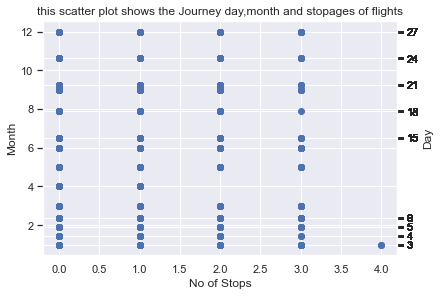

In [41]:
fig, ax = plt.subplots(constrained_layout=True)
month=list(df['Month_of_Journey'])
stopages=list(df["Total_Stops"])
day=list(df['Day_of_Journey'])
ax2=ax.twinx()
ax.scatter(stopages,month)
ax2.scatter(stopages,day)
ax.set_xlabel('No of Stops')
ax.set_ylabel('Month')
ax2.set_ylabel('Day')
plt.xticks(rotation=80,size=3)
plt.title("this scatter plot shows the Journey day,month and stopages of flights")
plt.yticks(day)
plt.show()

In [42]:
df['Day_of_Journey'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [43]:
df['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

# 5th Insights: On what Month have Maximum Flights Take off ?

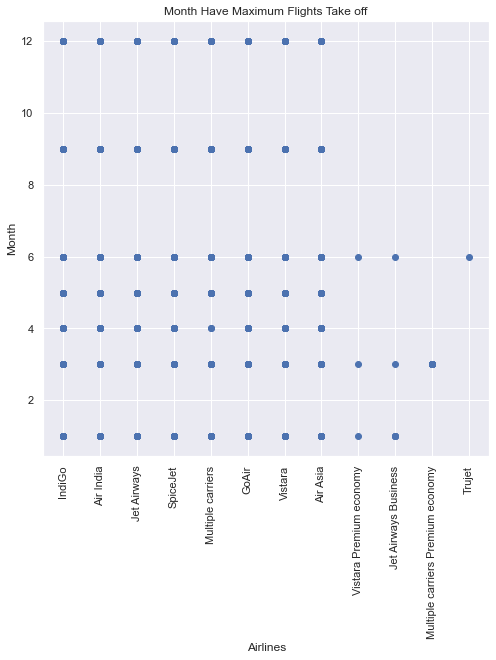

In [44]:
plt.figure(figsize=(8,8))
month=list(df['Month_of_Journey'])
airline=list(df['Airline'])
plt.scatter(airline,month)
plt.xticks(rotation=90)
plt.title('Month Have Maximum Flights Take off')
plt.xlabel('Airlines')
plt.ylabel('Month')
plt.show()

# 6th Insights: What Month has The Maximum Earning

In [45]:
#Aggregating Month with respect to price
df.groupby(['Month_of_Journey'])['Price'].sum()

Month_of_Journey
1     11279591
3     18647220
4      2217885
5     19414875
6     23369151
9     13429373
12     8719011
Name: Price, dtype: int64

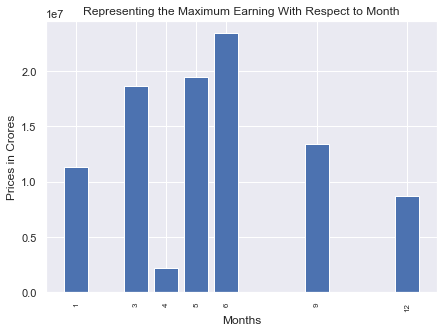

In [46]:
plt.figure(figsize=(7,5))
plt.title('Representing the Maximum Earning With Respect to Month')
keys=[months for months,df in df.groupby(["Month_of_Journey"])]

plt.bar(keys,df.groupby(["Month_of_Journey"]).sum()["Price"])
plt.xlabel('Months')
plt.ylabel('Prices in Crores')
plt.xticks(keys,rotation="vertical",size=8)
plt.show()

In [47]:
z=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).iloc[:,0]
z=list(z)
z

[11279591, 18647220, 2217885, 19414875, 23369151, 13429373, 8719011]

In [48]:
Y=list(df['Month_of_Journey'].unique())
Y

[3, 1, 9, 12, 6, 5, 4]

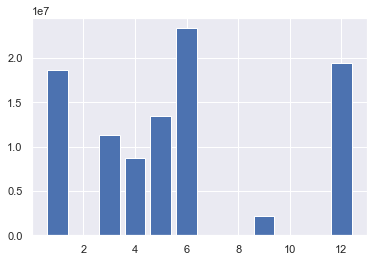

In [49]:
plt.bar(Y,z);

In [50]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [51]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [52]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [53]:
#Removing New in New Delhi from Destination column
destination=[]
for i in df['Destination']:
    if i=='New Delhi':
        destination.append(i.replace('New Delhi','Delhi'))
    else:
        destination.append(i)
        

In [54]:
#Dropping the Destination column to add the New column
df.drop(columns=['Destination'],inplace=True)

In [55]:
df.head(3)

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882,6,9


In [56]:
#Adding the new Column Destination which have filltered city names
df['Destination']=pd.Series(destination)

In [57]:
df.head(3)

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Destination
0,IndiGo,Banglore,BLR → DEL,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,3,Delhi
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662,5,1,Banglore
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882,6,9,Cochin


In [58]:
# Making list of all columns 
cols=df.columns.tolist()
cols


['Airline',
 'Source',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Destination']

In [59]:
#Slicing to arrange the position of Destination column
cols=cols[0:3]+cols[-1:]+cols[3:11]
cols

['Airline',
 'Source',
 'Route',
 'Destination',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey']

In [60]:
#Assigning all the column to the dataframe
df=df[cols]

In [61]:
df.head(3)

,Airline,Source,Route,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,BLR → DEL,Delhi,2023-02-03 22:20:00,2023-03-22 01:10:00,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,CCU → IXR → BBI → BLR,Banglore,2023-02-03 05:50:00,2023-02-03 13:15:00,7h 25m,2,No info,7662,5,1
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,Cochin,2023-02-03 09:25:00,2023-06-10 04:25:00,19h,2,No info,13882,6,9


In [62]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [63]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [64]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

# 7th Insights: Checking the Availablity of Flight with respect to Source and Destination

In [65]:
df1=df.groupby(['Source','Destination',])['Airline'].value_counts().reset_index

In [66]:
df1

<bound method Series.reset_index of Source    Destination  Airline                          
Banglore  Delhi        Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai   Kolkata      IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                

In [67]:
df.to_csv('air.csv')